## PAIR PROGRAMMING EDA III

### Outliers

---


Es el momento de hacer una buena exploración visual de los datos para entender un poquito mejor el dataset. 

Para ello trabajaremos con la librería matplotlib y seaborn.

#### **Hipótesis**

Antes de seguir, recordamos las preguntas que nos planteamos al principio del pair programming de EDA para dirigir nuestro análisis.

- ¿Es Australia es el sitio más peligroso y letal para estar relajada en la playa?
- ¿Hay diferencias entre los paises en los ataques a hombres y mujeres?
- ¿Cuáles son las edades que más sufren ataques?
- Independientemente de la edad, sufren los hombres más ataques que las mujeres?
- ¿En qué mes ocurren más ataques?
- ¿Cuál es la relación entre la especie y el tipo de ataque (si es fatal o no)?
- ¿Cómo han evolucionado los ataques a lo largo del tiempo

Actualizamos esta tabla ya que en el ejercicio de pair de Limpieza I y II ya dejamos algunas columnas limpitas:


- age ✔️ la limpiamos en el pair de Limpieza II
- species ✔️ la limpiamos en el pair de Limpieza II
- country ✔️ la limpiamos en el pair de Limpieza II
- fatal ✔️ la limpiamos en el pair de Pandas V
- year ✔️ es una columna de tipo float deberíamos convertirla a integer
- sex ✔️ la limpiamos en el pair de Pandas V
- fecha ✔️ la limpiamos en el pair de Pandas V

---

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable
import pickle
import re

pd.options.display.max_columns = None

In [3]:
# para evitar warnings 
import warnings
warnings.filterwarnings('ignore')

In [4]:
df= pd.read_pickle("../files/attacks9.pickle")
df.head()

,case_number,year,type,country,activity,age,species_,date,mes_ataque,fatal,sexo,cat_species,edades
0,1800.00.00,1800,Unprovoked,seychelles,a corsair's boat was overturned,NaN,NaN,1800,NaN,Y,F,NaN,NaN
1,1797.05.28.R,1797,Unprovoked,NaN,Dropped overboard,NaN,NaN,Reported May-28-1797,May,Y,NaN,NaN,NaN
2,1792.09.12,1792,Provoked,england,Fishing,NaN,NaN,12-Sep-1792,Sep,Y,M,NaN,NaN
3,1791.00.00,1791,Unprovoked,australia,NaN,NaN,NaN,1791,NaN,Y,F,NaN,NaN
4,1788.05.10,1788,Boat,australia,Fishing,NaN,NaN,10-May-1788,May,N,NaN,NaN,NaN


---

#### **Objetivos**

En el ejercicio de hoy tendremos que contestar a las siguientes preguntas:


📌 Nota Como siempre, después de cada gráfica incluid una pequeña explicación de lo que nos está mostrando la gráfica.

**EJERCICIO 1**

Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

In [5]:
# figamos el tamaño de las gráficas
plt.rcParams["figure.figsize"] = (10,8)

---

**EJERCICIO 2**

Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:

- ¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.



In [6]:
len(df.country.value_counts()) #comprobamos la longitud de la columna para saber la cantidad de países

95

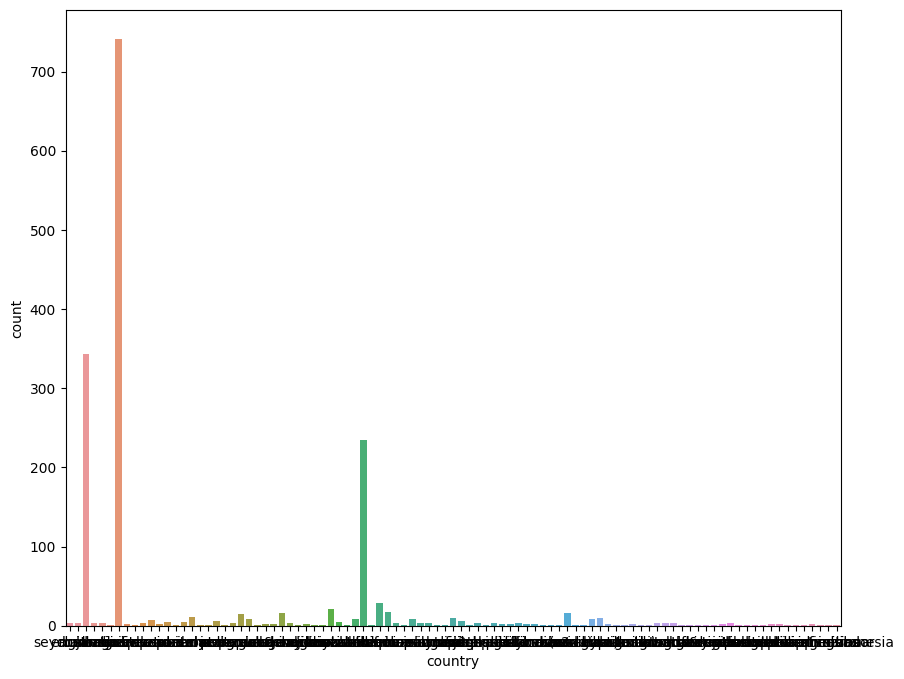

In [7]:
sns.countplot(x = 'country', data = df) # Intentamos graficar con todos los paises.
plt.show();

    - No podemos ver los datos de manera clara si seleccionamos todos los países asique hacemos la selección de los diez países con más ataques.

In [8]:
paises_10 = dict(df["country"].value_counts()[:10]) # Seleccionamos los diez primeros pasises con mas ataques.
paises_10

{'usa': 741,
 'australia': 343,
 'south africa': 234,
 'bahamas': 29,
 'new zealand': 21,
 'reunion': 17,
 'papua new guinea': 16,
 'brazil': 16,
 'mexico': 15,
 'italy': 11}

In [9]:
df_10 = df[df['country'].isin(paises_10)] # Creamos un nuevo DataFrame que traiga solo los registros de los 10 paises.
df_10

,case_number,year,type,country,activity,age,species_,date,mes_ataque,fatal,sexo,cat_species,edades
3,1791.00.00,1791,Unprovoked,australia,NaN,NaN,NaN,1791,NaN,Y,F,NaN,NaN
4,1788.05.10,1788,Boat,australia,Fishing,NaN,NaN,10-May-1788,May,N,NaN,NaN,NaN
10,1780.08.08,1780,Unprovoked,usa,Swimming,NaN,NaN,08-Aug-1780,Aug,Y,M,NaN,NaN
11,1779.00.00,1779,Unprovoked,usa,Surfing,young,NaN,1779,NaN,Y,M,NaN,NaN
14,1771.07.12.R,1771,Unprovoked,usa,Fishing,NaN,NaN,Reported 12-Jul-1771,Jul,Y,M,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,1905.03.26,1905,Unprovoked,australia,Bathing,40,5' shark,26-Mar-1905,Mar,N,M,Unspecified,40.0
1667,1901.07.30,1901,Unprovoked,south africa,Swimming,29,White shark,30-Jul-1901,Jul,Y,M,White,29.0
1668,1894.11.28,1894,Unprovoked,australia,Bathing,19,10' to 12' shark,28-Nov-1894,Nov,N,M,Unspecified,19.0
1669,1892.03.02,1892,Provoked,australia,Fishing,21,12' shark,02-Mar-1892,Mar,N,M,Unspecified,21.0


In [10]:
df_10['country'].value_counts() #comprobamos que están los diez paises

usa                 741
australia           343
south africa        234
bahamas              29
new zealand          21
reunion              17
papua new guinea     16
brazil               16
mexico               15
italy                11
Name: country, dtype: int64

In [ ]:
ordenado=

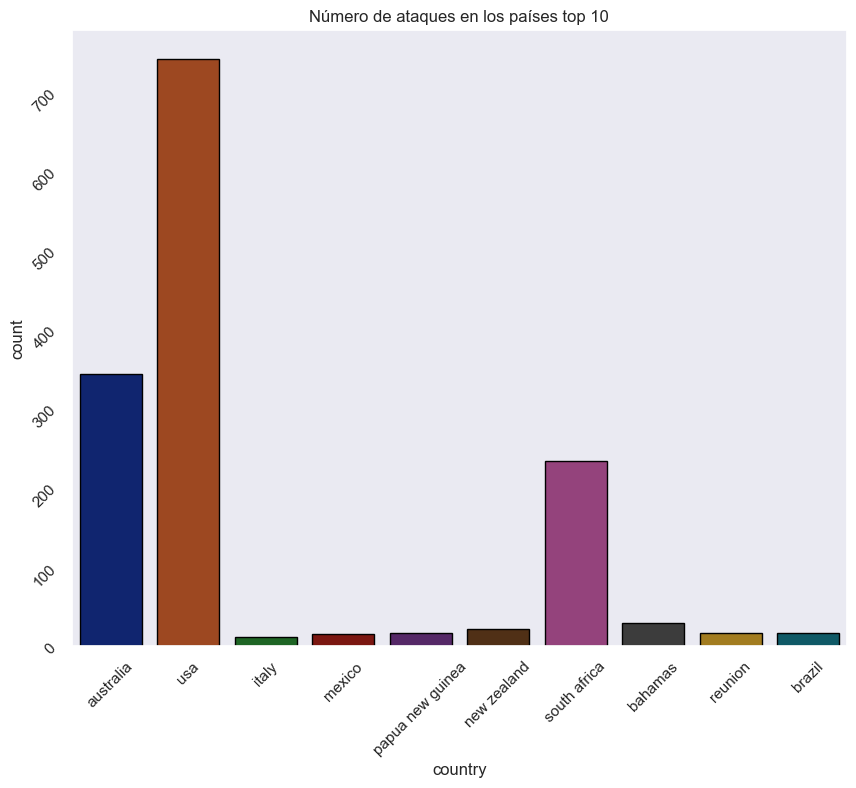

In [30]:
sns.countplot("country", data = df_10, edgecolor = 'black')

sns.set(style='dark', palette = 'dark')
plt.title('Número de ataques en los países top 10')
plt.tick_params(rotation=45)
plt.show(); 

    - Los países que más peso tienen son: USA con más de 700 ataques, Australia con más de 300 y Sudáfrica con más de 200. 

---

- Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?

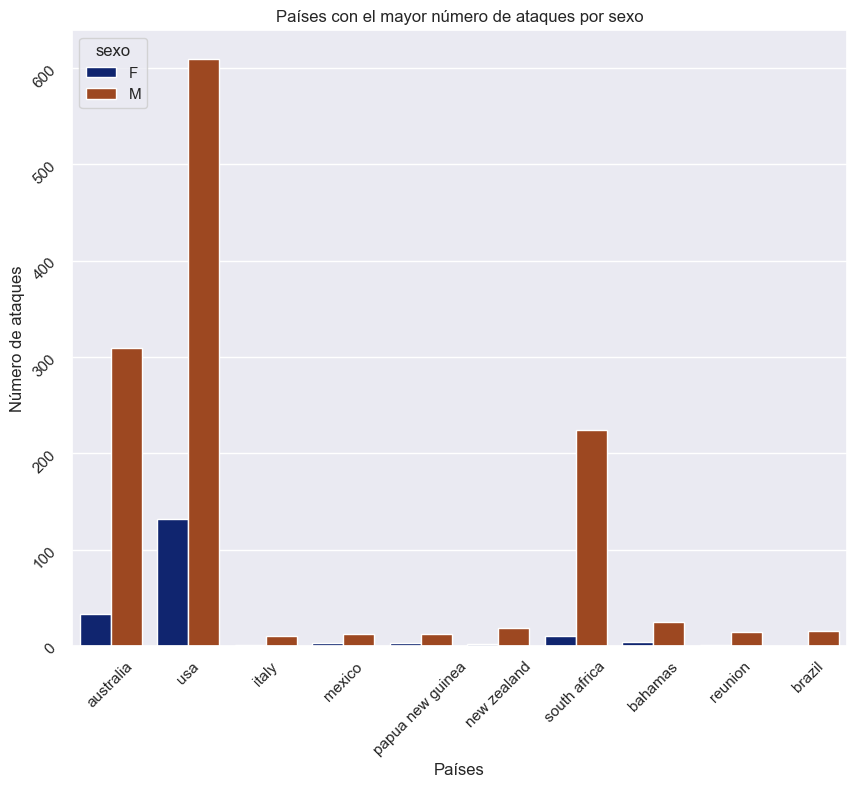

In [32]:
sns.countplot(x = 'country', data = df_10 , hue='sexo')

sns.set(style='darkgrid', palette = 'dark')

plt.xlabel('Países')
plt.ylabel('Número de ataques')
plt.title('Países con el mayor número de ataques por sexo')

plt.tick_params(rotation=45)
plt.show();


    - Hay una tendencia muy marcada en todos los países de mayor cantidad de casos en hombres que en mujeres.

---

- ¿Qué edad recibe mayor número de ataques? 💡 Pista 💡 Para que esta gráfica nos salga legible tendremos que crear antes grupos de edad. Para hacer esto de una forma sencilla tenemos el método pd.cut() que aprendimos en la lección de Limpieza II.

In [36]:
print(df.edades.min()) # Verificamos la menor edad
print(df.edades.max()) # Verificamos la mayor edad

5.0
84.0


In [37]:
df['rango_edad']= pd.cut(df['edades'], 3 , labels = ['Jovenes', 'Adultos', 'Ancianos']) # Categorizamos por edad.
df.head()

,case_number,year,type,country,activity,age,species_,date,mes_ataque,fatal,sexo,cat_species,edades,rango_edad
0,1800.00.00,1800,Unprovoked,seychelles,a corsair's boat was overturned,NaN,NaN,1800,NaN,Y,F,NaN,NaN,NaN
1,1797.05.28.R,1797,Unprovoked,NaN,Dropped overboard,NaN,NaN,Reported May-28-1797,May,Y,NaN,NaN,NaN,NaN
2,1792.09.12,1792,Provoked,england,Fishing,NaN,NaN,12-Sep-1792,Sep,Y,M,NaN,NaN,NaN
3,1791.00.00,1791,Unprovoked,australia,NaN,NaN,NaN,1791,NaN,Y,F,NaN,NaN,NaN
4,1788.05.10,1788,Boat,australia,Fishing,NaN,NaN,10-May-1788,May,N,NaN,NaN,NaN,NaN


In [38]:
df['rango_edad'].value_counts() # Realizamos el recuento de casos para cada categoria.

Jovenes     1000
Adultos      444
Ancianos      66
Name: rango_edad, dtype: int64

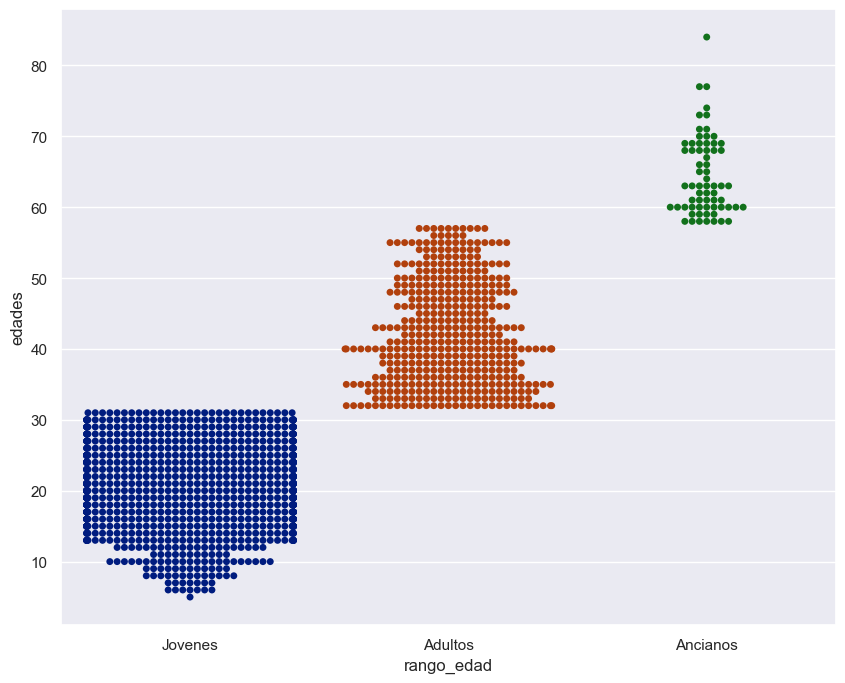

In [39]:
sns.swarmplot('rango_edad', 'edades', data = df)   

sns.set(style='darkgrid', palette = 'dark')


plt.show(); #comprobamos los rangos de edad que está tomando el método pd.cut para cada categoría

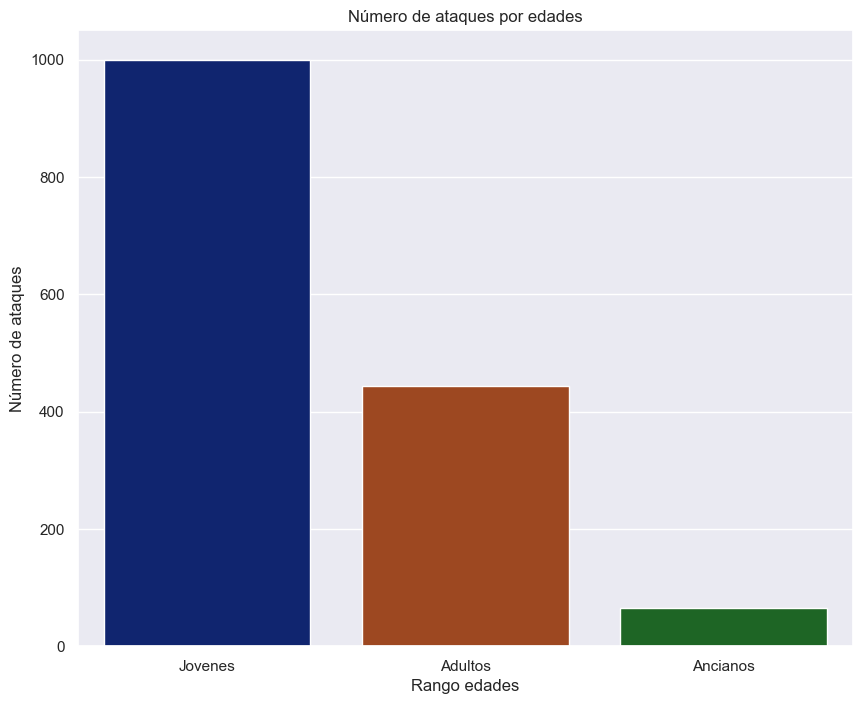

In [40]:
# Definimos la gráfica con los rangos de edad y el número de ataques

sns.countplot(x = 'rango_edad', data = df)

sns.set(style='darkgrid', palette = 'dark')

plt.xlabel('Rango edades')
plt.ylabel('Número de ataques')
plt.title('Número de ataques por edades')

plt.show();

    - Podemos observar que en la categoría jóvenes hay más ataques, entre los 12 y 30 años. 

---

- Ataques entre sexos, ¿hay diferencia?

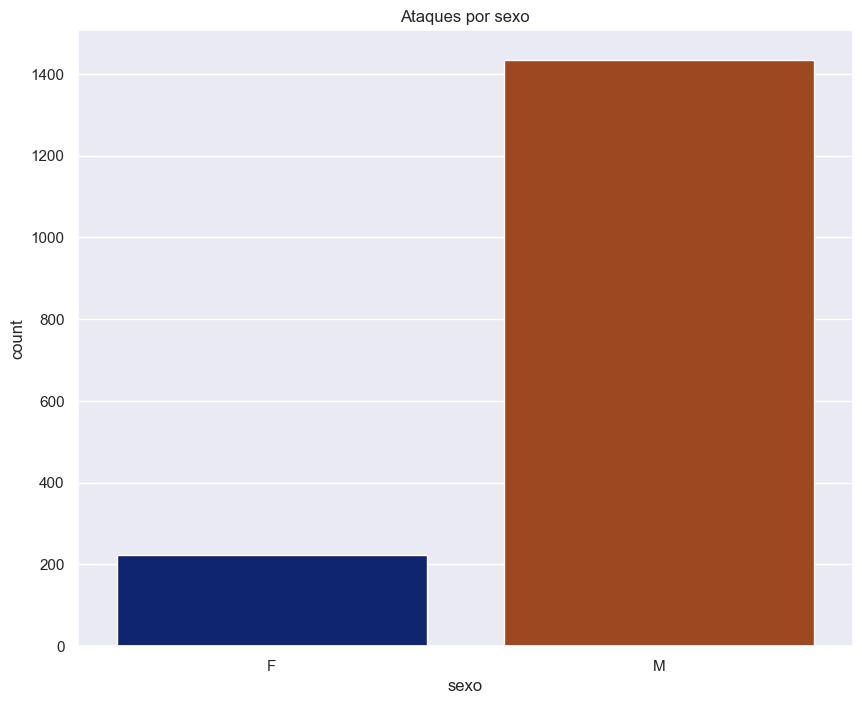

In [55]:
sns.countplot(x = "sexo", data = df)

sns.set(style='darkgrid', palette = 'dark')
plt.title('Ataques por sexo')
plt.show();

    - Vemos que la gran mayoría de casos se dan en hombres, con una diferencia que casi septuplica los ataques a mujeres.

---

- ¿Cuando ocurren más ataques? ¿Os sale algo raro en la gráfica? Intentad limpiar un poco los datos para que os salga mejor.

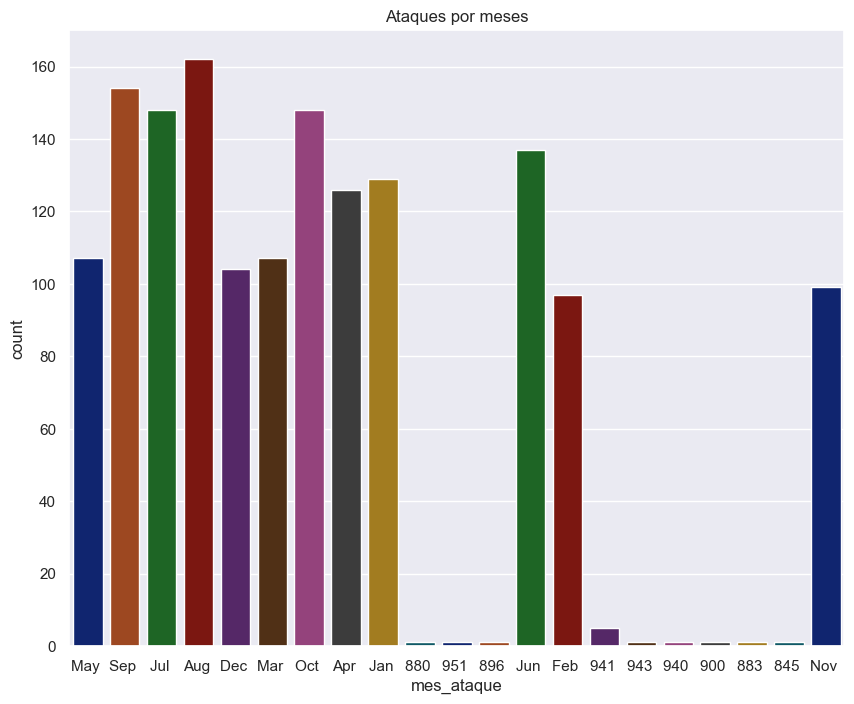

In [54]:
sns.countplot(x = "mes_ataque", data = df, palette = 'dark' )

plt.title('Ataques por meses')
plt.show(); #tenemos algún valor númerico en la columna mes_ataque

In [43]:
def mes(col): #Creamos la funcion para encontrar el mes en la columna date de nuevo porque vemos que hay errores.
    patron = '[\s|-](\D{3})[-]'
    try:
        mes = re.findall(patron,col)
        return mes[0]
        
    except: 
        return np.nan


In [44]:
df['mes'] = df['date'].apply(mes) #Aplicamos la funcion


In [45]:
df.mes.unique() # Comprobamos que los meses estan correctos.

array([nan, 'May', 'Sep', 'Jul', 'Aug', 'Dec', 'Mar', 'Oct', 'Apr', 'Jan',
       'Jun', 'Feb', 'Nov'], dtype=object)

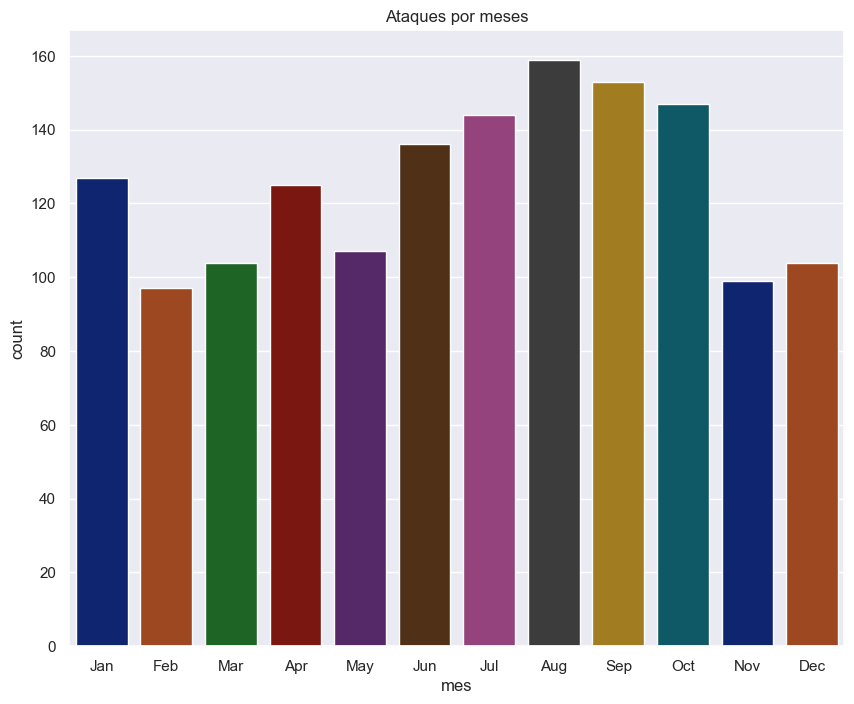

In [53]:
sns.countplot(x = "mes", data = df, palette='dark', order= ['Jan', 'Feb', 'Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.title('Ataques por meses')
plt.show();

    - Podemos observar que durante los meses de junio, julio, agosto, septiembre y octubre, es decir, la temporada de verano, del país que tiene más peso en nuestra muestra de datos que es USA, es cuando se podrucen mayor número de ataques.
    